<a href="https://colab.research.google.com/github/finntrinci/finntrinci.github.io/blob/main/Python/EPI_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests
import json
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/finntrinci/finntrinci.github.io/main/data/epi2022results.csv')
df.head(2) 

,code,iso,country,region,EPI.new,HLT.new,AIR.new,HAD.new,PMD.new,OZD.new,...,CCH.rnk.old,CDA.rnk.old,CHA.rnk.old,FGA.rnk.old,NDA.rnk.old,BCA.rnk.old,GHN.rnk.old,LCB.rnk.old,GIB.rnk.old,GHP.rnk.old
0,4,AFG,Afghanistan,Southern Asia,43.6,16.0,15.5,7.4,16.0,18.4,...,159,161,164,NaN,141,142,112,12.0,129,1
1,24,AGO,Angola,Sub-Saharan Africa,30.5,20.5,23.1,17.9,24.0,36.8,...,81,29,35,77.0,132,105,119,135.0,1,87


In [4]:
#Now from this dataset we want to only take the relevant variables. Here, I'm taking the 2022 (new) and 2012 (old) 
#values for the overall EPI, the CCH component (climate change measure), and then the indicators which make up the CCH
#measure.
varlist = ['code', 'iso', 'country', 'EPI.new', 'EPI.old', 'CCH.new', 'CCH.old', 'GHN.new', 'GHN.old', 'CDA.new', 'CDA.old', 'CHA.new', 'CHA.old', 'LCB.new', 'LCB.old', 'GIB.new', 'GIB.old', 'FGA.new', 'FGA.old', 'BCA.new', 'BCA.old', 'GHP.new', 'GHP.old', 'NDA.new', 'NDA.old', 'AIR.new', 'AIR.old', 'ACD.new', 'ACD.old' ]
df = df[varlist]
df.head(2)

,code,iso,country,EPI.new,EPI.old,CCH.new,CCH.old,GHN.new,GHN.old,CDA.new,...,BCA.new,BCA.old,GHP.new,GHP.old,NDA.new,NDA.old,AIR.new,AIR.old,ACD.new,ACD.old
0,4,AFG,Afghanistan,43.6,19.7,65.6,21.0,45.3,29.3,83.9,...,42.9,37.7,100.0,100.0,63.7,31.3,15.5,19.8,35.5,0.0
1,24,AGO,Angola,30.5,30.3,37.7,41.5,26.4,26.5,39.0,...,51.8,56.6,62.3,55.5,70.4,35.1,23.1,24.9,50.5,8.8


In [5]:
#renaming the columns so that my wide_to_long function works properly and returns a year column.
df.columns = ['code', 'iso', 'country', 'EPI_2022', 'EPI_2012', 'CCH_2022', 'CCH_2012', 'GHN_2022', 'GHN_2012', 'CDA_2022', 'CDA_2012', 'CHA_2022', 'CHA_2012', 'LCB_2022', 'LCB_2012', 'GIB_2022', 'GIB_2012', 'FGA_2022', 'FGA_2012', 'BCA_2022', 'BCA_2012', 'GHP_2022', 'GHP_2012', 'NDA_2022', 'NDA_2012', 'AIR_2022', 'AIR_2012', 'ACD_2022', 'ACD_2012']
df.head(2)

,code,iso,country,EPI_2022,EPI_2012,CCH_2022,CCH_2012,GHN_2022,GHN_2012,CDA_2022,...,BCA_2022,BCA_2012,GHP_2022,GHP_2012,NDA_2022,NDA_2012,AIR_2022,AIR_2012,ACD_2022,ACD_2012
0,4,AFG,Afghanistan,43.6,19.7,65.6,21.0,45.3,29.3,83.9,...,42.9,37.7,100.0,100.0,63.7,31.3,15.5,19.8,35.5,0.0
1,24,AGO,Angola,30.5,30.3,37.7,41.5,26.4,26.5,39.0,...,51.8,56.6,62.3,55.5,70.4,35.1,23.1,24.9,50.5,8.8


In [6]:
#Needto convert the data into TIDY format, should have 2 years for each country. YES IT WORKED
#each column with a stubname in the list is now split into 2, i being the stub and j being the year. 
#i is separated by j with "_" and the suffix is digits. 
df_t = pd.wide_to_long(df, stubnames=['EPI', 'CCH', 'GHN', 'CDA', 'CHA', 'LCB', 'GIB', 'FGA', 'BCA', 'GHP', 'NDA', 'AIR', 'ACD'], 
                i='code', j='year', suffix='(\d+)', sep='_').reset_index()
df_t.head(2)

,code,year,iso,country,EPI,CCH,GHN,CDA,CHA,LCB,GIB,FGA,BCA,GHP,NDA,AIR,ACD
0,4,2022,AFG,Afghanistan,43.6,65.6,45.3,83.9,50.2,100.0,77.5,NaN,42.9,100.0,63.7,15.5,35.5
1,24,2022,AGO,Angola,30.5,37.7,26.4,39.0,49.7,37.9,45.2,57.7,51.8,62.3,70.4,23.1,50.5


In [7]:
#we have missing values coded as NaN which Vega doesn't seem to like, going to change them to just an empty string.
#can't change to 0 since this isn't accurate and would influence the grouping.

df_t2 = df_t.fillna("")
df_t2

,code,year,iso,country,EPI,CCH,GHN,CDA,CHA,LCB,GIB,FGA,BCA,GHP,NDA,AIR,ACD
0,4,2022,AFG,Afghanistan,43.6,65.6,45.3,83.9,50.2,100.0,77.5,,42.9,100.0,63.7,15.5,35.5
1,24,2022,AGO,Angola,30.5,37.7,26.4,39.0,49.7,37.9,45.2,57.7,51.8,62.3,70.4,23.1,50.5
2,8,2022,ALB,Albania,47.1,52.5,53.9,42.3,50.1,87.3,49.6,59.4,100.0,61.5,76.9,37.5,90.2
3,784,2022,ARE,United Arab Emirates,52.4,34.0,13.3,42.0,20.8,100.0,54.7,70.8,100.0,0.0,39.0,41.7,59.2
4,32,2022,ARG,Argentina,41.1,35.5,11.7,51.8,40.2,86.7,29.2,10.6,83.1,33.4,47.7,52.0,85.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,548,2012,VUT,Vanuatu,46.1,67.4,79.5,71.0,35.8,30.8,36.7,,63.6,66.2,59.2,32.1,72.3
356,882,2012,WSM,Samoa,43.8,59.0,88.9,31.8,37.8,,52.8,,88.1,74.5,55.1,35.5,75.7
357,710,2012,ZAF,South Africa,27.1,25.3,0.0,32.2,38.4,69.9,42.3,49.4,77.0,17.3,85.9,14.7,55.3
358,894,2012,ZMB,Zambia,45.3,39.9,38.0,44.4,28.1,7.9,87.8,0.0,36.5,72.8,49.7,24.3,75.1


In [8]:
df_t.head(2)

,code,year,iso,country,EPI,CCH,GHN,CDA,CHA,LCB,GIB,FGA,BCA,GHP,NDA,AIR,ACD
0,4,2022,AFG,Afghanistan,43.6,65.6,45.3,83.9,50.2,100.0,77.5,NaN,42.9,100.0,63.7,15.5,35.5
1,24,2022,AGO,Angola,30.5,37.7,26.4,39.0,49.7,37.9,45.2,57.7,51.8,62.3,70.4,23.1,50.5


## Machine Learning

In [10]:
#ML time:

#From the scikit-learn flow chart, i should be using Mean Shift or VB-GMM (?)

from sklearn.cluster import KMeans


In [ ]:
#For future comparison with clustering, we want to add each country's continent as a var
#can do this using 'pycountry'
!pip install pycountry_convert
import pycountry_convert as pc

In [12]:
!pip install pycountry
import pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#strangely, from looking at the pycountry_convert directory, can only convert to continent codes from alpha2/3, not
#country numerics, so need to add country alpha2 to properly get continent codes, and then continent names.
dir(pc)

In [15]:
#converting country codes to 3 digits with leading 0s so alpha2 can be matched properly
df_t['code'] = df_t['code'].astype(str).str.zfill(3)

In [17]:
#now we get the country alpha2 from their numeric code.
def find_alpha2(country_numeric):
    try:
        return pycountry.countries.get(numeric=str(country_numeric)).alpha_2
    except:
        return ("not founded")
df_t['alpha2'] = df_t.apply(lambda row: find_alpha2(row.code) , axis = 1)

In [18]:
#now define a function which returns a continent name from a country alpha2.

def code_to_continent(country_alpha2):
  try:
        #from available commands in pc, need to convert to continent code and then conntinent name.
        return pc.convert_continent_code_to_continent_name(pc.country_alpha2_to_continent_code(country_alpha2))
  except:
    return ("not founded")

df_t['continent'] = df_t.apply(lambda row: code_to_continent(row.alpha2) , axis = 1)

#One country which was not founded, Timor-Leste, which is in Asia
#Correctly defined Alpha2 but pycountry couldn't convert the code into a continent, need to rename manually:
df_t['continent'] = df_t['continent'].replace(["not founded"], "Asia")



In [ ]:
df_t

In [21]:
#Now we want these continents in encoded form, can use sklearn for this

from sklearn.preprocessing import LabelEncoder  

le = LabelEncoder()
df_t['continent_code'] = le.fit_transform(df_t['continent'])

In [ ]:
#Exporting this dataset to use for other ML applications:
import json
exported_values = list(df_t.T.to_dict().values())
open('EPI2022_for_ML.json', "w").write(json.dumps(exported_values))

In [ ]:
#Need just the X matrix from our data, first create df_t3 which only contains 2022 data:
df_t3 = df_t[df_t['year'] == 2022]
df_t3

In [23]:
#now for our KMeans clustering, we want only our indicators as columns, no string vars.
varlist = ['EPI', 'CCH', 'GHN', 'CDA', 'CHA', 'GIB', 'BCA', 'GHP', 'NDA', 'AIR', 'ACD']
df_X22 = df_t3[varlist]

In [ ]:
df_X22

In [ ]:
#PROBLEM: our FGA and LCB vars include NaN values.
# I think excluding those variables will work, but it means we lose 2 dimensions to match on :(

In [ ]:
from sklearn.utils.validation import column_or_1d

k_means = KMeans(n_clusters=6, random_state=0) # Fixing the RNG in Kmeans
cluster = k_means.fit_predict(df_X22)


cluster

In [26]:
#In vega, when selecting clusters, 0 wouldn't work, so we are changing cluster 0 to be cluster 6 (0+6)
#and leaving the rest of the clusters as they are.
cluster = np.where((cluster==0), cluster+6, cluster)

In [ ]:
df_t3['cluster'] = cluster

In [ ]:
df_t3

In [ ]:
#Export this clustered version of countries
import json
exported_values = list(df_t3.T.to_dict().values())
open('EPI2022_clustered(c_6).json', "w").write(json.dumps(exported_values))

## Dimensionality Reduction

In [ ]:
#Dimensionality Reduction to visualise these groups.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

W = PCA(2).fit_transform(df_X22)

Text(0.5, 1.0, 'clusters = continents')

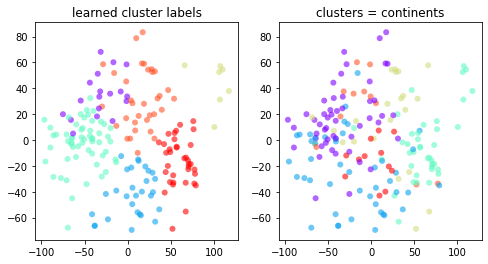

In [ ]:
kwargs = dict(cmap=plt.cm.get_cmap("rainbow", 10), edgecolor="none", alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(W[:, 0], W[:, 1], c=cluster, **kwargs)
ax[0].set_title("learned cluster labels")
ax[1].scatter(W[:, 0], W[:, 1], c=df_t3['continent_code'], **kwargs)
ax[1].set_title("clusters = continents")



In [ ]:









#now I want to make this same graph in vega-lite so that i can show country names on the tooltip, 
#need to create a dataset with country codes, names, continents, clusters, and the 2 dimensions from our dimensionality reduction.

In [ ]:
columns = ['code', 'country', 'continent', 'continent_code', 'cluster']
df_d2 = df_t3[columns]


In [ ]:
df_d2

In [ ]:
df_d2['dim1'] = W[:, 0]
df_d2['dim2'] = W[:, 1]

<ipython-input-32-db75be484dc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d2['dim1'] = W[:, 0]
<ipython-input-32-db75be484dc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d2['dim2'] = W[:, 1]


In [ ]:
#exporting df_d2 to create vega chart
import json
exported_values = list(df_d2.T.to_dict().values())
open('EPI_d2_clustering.json', "w").write(json.dumps(exported_values))





27943

In [ ]:
#Silhouette scores show the 'fit' essentially of the kmeans model. Closer to 1 is better, closer to -1 is worse. 
#I want to assign continent dummies for each country and then see which better-describes the grouping.
from sklearn.metrics import silhouette_score
silhouette_score(df_X22, cluster)

0.17745114226803285

In [ ]:

silhouette_score(df_X22, df_t3['continent_code'])

0.003747725708036966

In [ ]:
#We can see here that the silhouette score from my clustering is over 47 times higher than from continents.
#shows that the clustering is a much better fit for the data. 
print(silhouette_score(df_X22, cluster)/silhouette_score(df_X22, df_t3['continent_code']))

47.34902073742761


In [ ]:
#To 'rank' the clusters in terms of highest to lowest average environmental performance, I will create an average
#of each dimension for each cluster. This average should roughly be the center point of each cluster on the scatter.
#After ranking the clusters i can then see the disaster intensity within each cluster. 

df_averages = df_d2.groupby('cluster')['dim1', 'dim2'].mean()
df_averages['average'] = df_averages['dim1']+df_averages['dim2']
df_averages

<ipython-input-34-2d3b3b45c685>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_averages = df_d2.groupby('cluster')['dim1', 'dim2'].mean()


,dim1,dim2,average
cluster,,,
0,-31.611677,34.392994,2.781317
1,5.969940,-41.573628,-35.603688
2,-52.252524,-2.742759,-54.995283
3,101.989676,43.056984,145.046661
4,15.229203,31.701661,46.930864
5,59.938454,-16.795975,43.142478


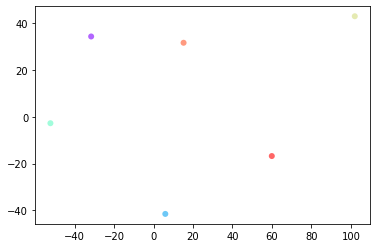

In [ ]:
kwargs = dict(cmap=plt.cm.get_cmap("rainbow", 10), edgecolor="none", alpha=0.6)
plt.scatter(df_averages['dim1'], df_averages['dim2'], c=df_averages.index, **kwargs)


## Other Type of Rearranging (not relevant)









In [ ]:
#Alternative Way to arrange the data, puts year column and then a column for each var. NOT NEEDED

df2 = df.set_index(['code', 'iso', 'country']).stack().reset_index()
df2.head()
df2['var'] =df2['level_3'].str.split('_').str[0]
df2['year'] = df2['level_3'].str.split('_').str[1]
df3 = df2.drop('level_3', axis=1)
df4 = df3.rename(columns={0:"Value"})
df4

In [ ]:
#Exporting a version of the entire datset cleaned .

import json
exported_values = list(df_t2.T.to_dict().values())
open('EPI2022_2012.json', "w").write(json.dumps(exported_values))

91617

## Comparing 2012 and 2022 Data

In [1]:
import pandas as pd
import json
import numpy as np

In [ ]:
#create df_t from above
df_t

In [31]:
df_na = df_t[df_t.isna().any(axis=1)]

In [32]:
#Can see that FGA and LCB have NaN values, problem for dimensionality reduction so don't consider these.
varlist = ['EPI', 'CCH', 'GHN', 'CDA', 'CHA', 'GIB', 'BCA', 'GHP', 'NDA', 'AIR', 'ACD']
df_dim_red_1 = df_t[varlist]

In [ ]:
#Perform the dimensionality reduction
from sklearn.decomposition import PCA
W = PCA(1).fit_transform(df_dim_red_1)
W

In [ ]:
#Append this to the dataset as a new column
df_t['1dim'] = W
df_t

In [ ]:
#Now we create a difference between the 2012 and 2022 dimensions for each country.
df_t = df_t.sort_values(['code', 'year'])
df_t['difference'] = df_t['1dim'].diff()
df_t.loc[df_t['year'] == 2012,['difference']] = np.nan
df_t

In [37]:
#add clustering results from our 'cluster helper' dataframe. Using this live file so that clustering is consistent across
#datasets rather than re-clustering and risking the cluster labels / countries changing.
cluster_helper = pd.read_json('https://raw.githubusercontent.com/finntrinci/finntrinci.github.io/main/data/cluster_helper.json')

In [46]:
#change country code to integer to merge datasets.
df_t_mod = df_t
df_t_mod['code'] = df_t_mod['code'].astype(int)

In [54]:
#merging clusters into dataset
df_averages = pd.merge(df_t_mod, cluster_helper, on = ['code', 'country', 'iso'], how='left')

In [55]:
#making the dataset look cleaner
varlist = ['code', 'year', 'iso', 'country', 'continent', '1dim', 'difference', 'cluster']
df_averages = df_averages[varlist]

In [ ]:
#creating an average of 1dim by cluster and year to have 2 observations for each cluster.
df_averages['1dim_cluster'] = df_averages['1dim'].groupby([df_averages['cluster'], df_averages['year']]).transform('mean')

#Creating a variable of the difference between the average score by cluster and year. 
#i.e. if cluster 1 is 10 in 2012 and 12 in 2022, this will be equal to 2.
df_averages['diff_avg'] = df_averages['difference'].groupby(df_averages['cluster']).transform('mean')

#condensing the dataset to have 2 observations per cluster.
df_averages_condense = df_averages[['cluster', '1dim_cluster', 'year', 'diff_avg']].drop_duplicates()

#Creating an indicator variable for whether the change from 2012 to 2022 is positive or negative (dummy variable)
df_averages_condense["positive"] = np.where(df_averages_condense["diff_avg"]>0,1,0)
df_averages_condense

In [63]:
#exporting this to append to our disaster data.
import json
exported_values = list(df_averages_condense.T.to_dict().values())
open('EPI_cluster_avg_diff.json', "w").write(json.dumps(exported_values))

1428

## Different type of differences output (not used):

In [ ]:
df_differences = df_t[df_t['difference'].notna()]
df_differences

In [36]:
#add clustering results from our 'cluster helper' dataframe. Using this live file so that clustering is consistent across
#datasets rather than re-clustering and risking the cluster labels / countries changing.
cluster_helper = pd.read_json('https://raw.githubusercontent.com/finntrinci/finntrinci.github.io/main/data/cluster_helper.json')

In [44]:
#merging clusters into dataset
df_differences_clus = pd.merge(df_differences, cluster_helper, on = ['code', 'country', 'iso'], how='left')

In [47]:
df_differences_clus['diff_avg'] = df_differences_clus['difference'].groupby(df_differences_clus['cluster']).transform('mean')
df_differences_clus2 = df_differences_clus[['cluster', 'diff_avg']].drop_duplicates()
df_differences_clus2

,cluster,diff_avg
0,4,25.271902
2,1,29.411336
3,2,-5.425174
7,5,18.179480
13,3,44.419001
20,6,0.766087


In [48]:
#exporting this to append to our disaster data.
import json
exported_values = list(df_differences_clus2.T.to_dict().values())
open('EPI_cluster_avg_diff.json', "w").write(json.dumps(exported_values))

300